In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [2]:
#Carregando Dataset
df = pd.read_csv('alternativas-real.csv',engine='python', sep=',')

#Analisando Shape da Matriz
#df.shape

#Lendo 5 primeiras linhas of the dataframe.
df.head()

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,Question11,Question12,Content
0,52,53,60,62,65,70,73,79,82,86,89,93,5
1,50,53,60,62,68,70,73,77,83,87,91,94,5
2,51,53,60,64,68,71,76,80,84,88,90,95,6
3,51,53,60,64,68,71,73,80,84,85,89,95,6
4,49,54,60,63,66,69,76,79,84,86,90,96,4


In [3]:
#Separando "Features" e Variável "Target"
X = df.drop('Content',axis=1).values
y = df['Content'].values

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

#Separando base em treino e teste (20% para Teste, 80% para Treino)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

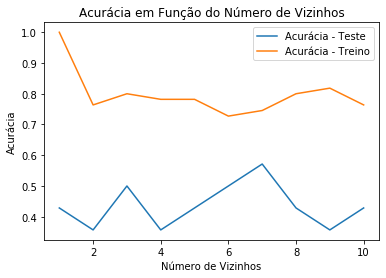

In [4]:
#Configurando base para avaliar Acurácia
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Configurando knn classifier com k vizinho
    knn = KNeighborsClassifier(n_neighbors=k)

    #Treinando o Modelo
    knn.fit(X_train, y_train)  

    #Calculando acurácia para conjunto de treinamento
    train_accuracy[i] = knn.score(X_train, y_train)  

    #Calculando acurácia para conjunto de teste
    test_accuracy[i] = knn.score(X_test, y_test)
    
#Generate plot
plt.title('Acurácia em Função do Número de Vizinhos')
plt.plot(neighbors, test_accuracy, label='Acurácia - Teste')
plt.plot(neighbors, train_accuracy, label='Acurácia - Treino')
plt.legend()
plt.xlabel('Número de Vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [5]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print("Acurácia do Modelo =",knn.score(X_test,y_test))

Acurácia do Modelo = 0.5714285714285714


In [6]:
#K-FOLD
neighbors = range(1,18,2)
train = np.empty(len(neighbors))
test = np.empty(len(neighbors))

for i in neighbors:
    count = 0
    train_accuracy =np.empty(len(X))
    test_accuracy = np.empty(len(X))

    kf = KFold(n_splits=10)
    for train, test in kf.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        
        #Calculando acurácia para conjunto de treinamento
        train_accuracy[count] = knn.score(X_train, y_train)  

        #Calculando acurácia para conjunto de teste
        test_accuracy[count] = knn.score(X_test, y_test)
        
        count += 1
    
    print("k: %s" % i)
    print("train_accuracy: %s" % train_accuracy.mean())
    print("test_accuracy: %s" % test_accuracy.mean())

k: 1
train_accuracy: 0.14492753623188406
test_accuracy: 0.08385093167701863
k: 3
train_accuracy: 0.11972290864296473
test_accuracy: 0.09006211180124224
k: 5
train_accuracy: 0.11084025319649443
test_accuracy: 0.08143547273982056
k: 7
train_accuracy: 0.10781629154700682
test_accuracy: 0.08799171842650103
k: 9
train_accuracy: 0.10735249374800568
test_accuracy: 0.0862663906142167
k: 11
train_accuracy: 0.10245107860816136
test_accuracy: 0.07556935817805384
k: 13
train_accuracy: 0.09567592036035234
test_accuracy: 0.07763975155279504
k: 15
train_accuracy: 0.0912420134019012
test_accuracy: 0.07349896480331262
k: 17
train_accuracy: 0.08914564735041593
test_accuracy: 0.061076604554865424


In [7]:
#Leave One Out (LOO)
from sklearn.model_selection import LeaveOneOut

neighbors = range(1,18,2)

for i in neighbors:
    train_accuracy =np.empty(len(X))
    test_accuracy = np.empty(len(X))

    loo = LeaveOneOut()
    for train, test in loo.split(X):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)

        #Calculando acurácia para conjunto de treinamento
        train_accuracy[test] = knn.score(X_train, y_train)  

        #Calculando acurácia para conjunto de teste
        test_accuracy[test] = knn.score(X_test, y_test)

    print("k: %s" % i)
    print("train_accuracy: %s" % train_accuracy.mean())
    print("test_accuracy: %s" % test_accuracy.mean())

k: 1
train_accuracy: 1.0
test_accuracy: 0.6086956521739131
k: 3
train_accuracy: 0.8346121057118497
test_accuracy: 0.6811594202898551
k: 5
train_accuracy: 0.76768968456948
test_accuracy: 0.5942028985507246
k: 7
train_accuracy: 0.7299658994032394
test_accuracy: 0.6376811594202898
k: 9
train_accuracy: 0.7401960784313724
test_accuracy: 0.6811594202898551
k: 11
train_accuracy: 0.7054560954816709
test_accuracy: 0.6231884057971014
k: 13
train_accuracy: 0.6698635976129584
test_accuracy: 0.5942028985507246
k: 15
train_accuracy: 0.636828644501279
test_accuracy: 0.5507246376811594
k: 17
train_accuracy: 0.6202046035805626
test_accuracy: 0.5507246376811594
